In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM,  IsingHamiltonian, IsingHamiltonianReduced


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [3]:
seed=42
#Initializing starting values 



In [17]:
visible_list = []
hidden_list = []
for v in range(2,10):
    np.random.seed(seed)
    visible_size = v

    gamma = utils.random_gamma(n=v)
    hamiltonian = IsingHamiltonianReduced(gamma=gamma)
    diag_h = IsingHamiltonian(gamma=gamma)
    
    eig,_ = np.linalg.eigh(diag_h)
    E_truth = np.min(eig)
    
    for h in range(1, 5):
        
        rbm = RBM(visible_size=visible_size, hidden_size=h, hamiltonian=hamiltonian, walker_steps=1000)
        
        energies = rbm.train(iterations=2000, lr=0.01, print_energy=False, termination_condition=(0.01, E_truth))

        if utils.relative_error(energies[-1], E_truth) < 0.01:
            visible_list.append(v)
            hidden_list.append(h)
            break
        
        



func:train args:[(<src.nqs.RBM object at 0x00000265ECE2DD60>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -0.4967141530112327)}] took: 16.67883801460266 sec
func:train args:[(<src.nqs.RBM object at 0x00000265EDAB0220>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -0.6349784541824174)}] took: 25.73885464668274 sec
func:train args:[(<src.nqs.RBM object at 0x00000265F4226FA0>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -1.2826669922831107)}] took: 567.1336843967438 sec
func:train args:[(<src.nqs.RBM object at 0x00000265ECE2D340>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -1.2826669922831107)}] took: 98.44935369491577 sec
func:train args:[(<src.nqs.RBM object at 0x00000265F4226FA0>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -2.8056968486911362)}] took: 49.8490

visble= [2, 3, 4, 5, 6, 7, 8, 9]
hidden = [1, 1, 2, 1, 1, 1, 3, 3]


<IPython.core.display.Javascript object>


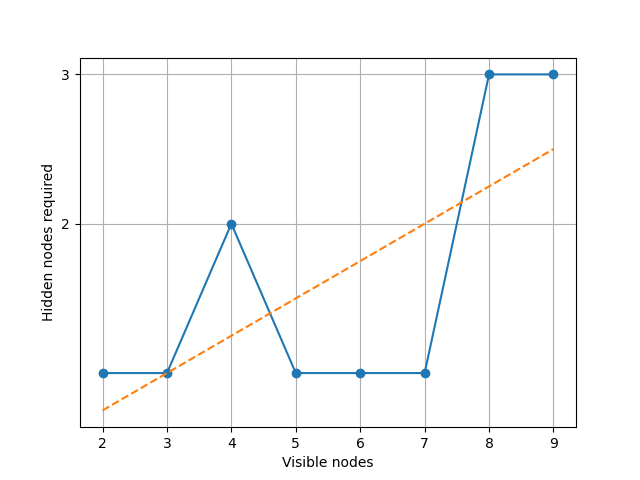

<class 'list'>


In [33]:
#labels = [f"Hidden size= {i}" for i in range(1,5)]

print(f"visble= {visible_list}")
print(f"hidden = {hidden_list}")
import math

yint = range(math.floor(min(visible_list)), math.ceil(max(visible_list))+1)

plt.figure(0)
plt.yticks(yint)
plt.plot(yint, hidden_list, marker='o')
    


plt.xlabel("Visible nodes")
plt.ylabel(r'Hidden nodes required')
plt.grid()
#plt.legend(labels)


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(visible_list, hidden_list, 1)

print(type(visible_list))

#use red as color for regression line
plt.plot(visible_list, m*np.asarray(visible_list)+b, '--')


In [ ]:
labels.append("True energy")
plt.figure(i)
# plt.ioff() # uncomment to stop plotting in notebook

yint = range(min(visible_list), math.ceil(visible_list))+1)
matplotlib.pyplot.yticks(yint)

for energy in energy_list:
    plt.plot(energy)
    plt.xlabel('Gradient steps')
    plt.ylabel('Energy')

plt.title(f"Training of RBM with {visible_size} visible nodes")
plt.axhline(y=E_truth, color='k', linestyle='--')
plt.legend(labels)

In [6]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-2_node_plots"
os.makedirs(path)
plt.savefig(f"{path}/{n_vis}nodes.pdf")

NameError: name 'n_vis' is not defined